# Imports

In [2]:
import numpy as np
import pandas as pd

In [3]:
from utils.clustering import (create_subset_df, create_cluster_vectors,
    get_candidate_cluster_size_elbow_method, get_candidate_cluster_size_silhouette_method,
    create_clusters, create_cluster_plot, create_cluster_html_tiers)

# Grabbing Data

In [4]:
df_all = pd.read_pickle("../../FantasyData/data-frames/df_all_2005_2023.pkl")

In [5]:
season = 2023
position = 'WR'

In [6]:
df_review = df_all.query(f"season == {season} and position == '{position}' and games >= 5").copy()

### Verifying Data

In [7]:
assert(df_review["position"].unique()[0] == position)
assert(df_review["season"].unique()[0] == season)
assert(df_review["games"].max() == 17)

# Clustering

In [8]:
df_review.columns

Index(['player_id', 'season', 'season_type', 'completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share',
       'wopr_x', 'special_teams_tds', 'fantasy_points', 'fantasy_points_ppr',
       'games', 'tgt_sh', 'ay_sh', 'yac_sh', 'wopr_y', 'ry_sh', 'rtd_sh',
       'rfd_sh', 'rtdfd_sh', 'dom', '

## Selecting Stats for Clusters

### QB Version

Columns for QBs:

```
qb_cols = ['completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota']
```

In [10]:
df_review["completion_percentage"] = df_review["completions"] / df_review["attempts"]

Subset options:
```
subset_cols = ['fantasy_points', 'passing_yards', 'passing_tds', 'rushing_tds', 'rushing_yards']
subset_cols = ['fantasy_points', 'passing_yards', 'passing_tds', 'interceptions', 'completion_percentage', 'sacks']
subset_cols = ['fantasy_points', 'pacr', 'dakota', 'passing_epa', 'passing_air_yards']
subset_cols = ['fantasy_points', 'carries', 'rushing_yards', 'rushing_tds',]
subset_cols = ['fantasy_points', 'rushing_epa', 'rushing_first_downs']
subset_cols = ['completions', 'attempts', 'passing_yards', 'passing_tds', 'interceptions']
```

### WR Version

WR cols:

```
wr_cols = ['receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'racr', 'target_share', 'air_yards_share',
       'wopr_x', 'fantasy_points', 'fantasy_points_ppr',
       'tgt_sh', 'ay_sh', 'yac_sh', 'wopr_y', 'ry_sh', 'rtd_sh',
       'rfd_sh', 'rtdfd_sh', 'dom', 'w8dom', 'yptmpa', 'ppr_sh']
```

Subset options: 

## Subset Selection

In [12]:
subset_cols = ['fantasy_points_ppr', 'receptions', 'targets', 'receiving_yards', 'receiving_tds']

## Division Selection

In [13]:
div_col = "games"
div_col_name = "game"

## Create Subset DFs

Season total version:

In [14]:
subset_df, subset_cols = create_subset_df(df_review.copy(), subset_cols, drop_fantasy=False)

Per X version:

In [15]:
subset_df, subset_cols = create_subset_df(df_review.copy(), subset_cols, drop_fantasy=False,
                                          div_col=div_col, div_col_name=div_col_name)

## Prepping Model

In [16]:
X, X_scaled = create_cluster_vectors(subset_df)

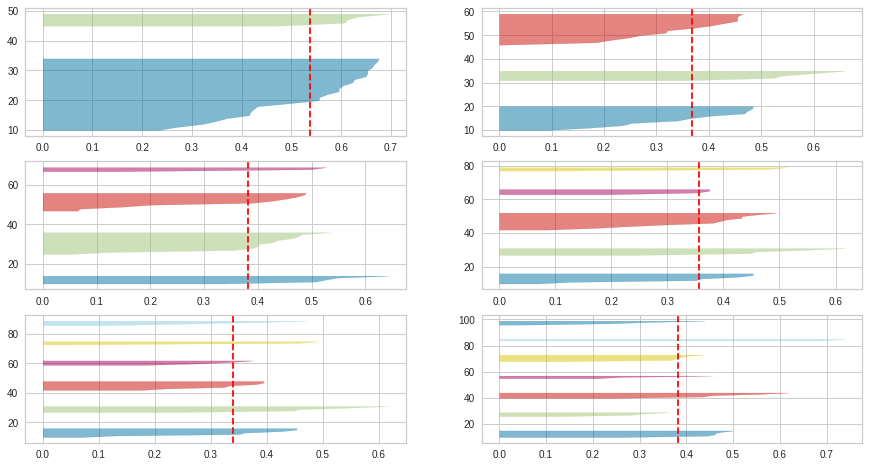

In [17]:
km = get_candidate_cluster_size_silhouette_method(X_scaled)

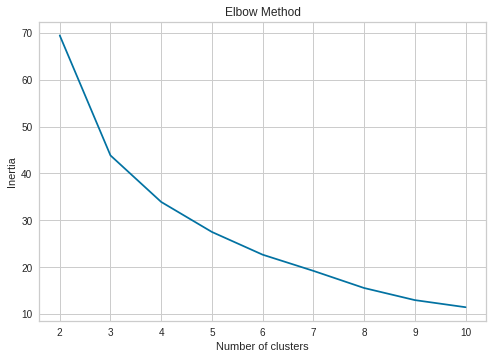

In [18]:
kmeans = get_candidate_cluster_size_elbow_method(X_scaled)

## Creating Cluster

Parameters for clustering:

In [19]:
n = 4
clustering = kmeans

Cluster df and dict mapping for player names:

In [20]:
df_cluster, cluster_ranking = create_clusters(n, clustering, X, X_scaled, df_review, subset_df, subset_cols,)

## Cluster Plot

Want to probably save figures somewhere here: `../../interactive-2.0/<position>/<blog_post>/<fig_name>.html`

In [24]:
save_path = f"../../interactive-2.0/{position}/2023-review-pt2/basic-cluster-per-game.html"

In [25]:
create_cluster_plot(df_cluster, cluster_ranking, subset_cols,
                    save_path=save_path, font_size=12, marker_size=4, diagonal_is_visible=False,
                    width=1000, height=1000, showupperhalf=False, legend_size=14)

In [26]:
create_cluster_html_tiers(df_cluster)

			<div>
				<p class='blog-p-tag'>
					TODO
				</p>
				<div class='iframe-container'>
					<iframe class='large-iframe' data-src='TODO'></iframe>
				</div>
				<p class='blog-p-tag'>
					TODO:
				</p>
				<ul class='bullet-list'>
					<li><b>Cluster 0:</b> TODO</li>
					<li><b>Cluster 1:</b> TODO</li>
					<li><b>Cluster 2:</b> TODO</li>
					<li><b>Cluster 3:</b> TODO</li>
				</ul>
				<div style='display: flex; justify-content: space-evenly;''>
					<div>
						<b>Cluster 0 ()</b>
						<ul class='bullet-list'>
							<li>DeAndre Hopkins</li>
							<li>Rashee Rice</li>
							<li>Calvin Ridley</li>
							<li>Jayden Reed</li>
							<li>Adam Thielen</li>
						</ul>
					</div>

					<div>
						<b>Cluster 1 ()</b>
						<ul class='bullet-list'>
							<li>Stefon Diggs</li>
							<li>Michael Pittman</li>
							<li>Brandon Aiyuk</li>
							<li>Amari Cooper</li>
							<li>Chris Olave</li>
							<li>Davante Adams</li>
							<li>Jaylen Waddle</li>
							<li>D.K. Metcalf<